Proyek sebagai pemenuhan tugas akhir mata kuliah komputasi statistik.

Disusun bersama kelompok saya Putri dan Naufal.

Statistika, FMIPA UNS 2024.


---


source data : https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install ucimlrepo

# Import dan set the data

In [3]:
from ucimlrepo import fetch_ucirepo

# Mengambil data dari UCI
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# Mendeklrasikan Variabel X(features) dan Variabel Y (Target)
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

# metadata atau informasi umum dari data
print(rice_cammeo_and_osmancik.metadata)

# variable information atau informasi dari variabel
print(rice_cammeo_and_osmancik.variables)

{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent Systems and App

In [4]:
X # Melihat data X

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064


In [5]:
y # Melihat data Y

,Class
0,Cammeo
1,Cammeo
2,Cammeo
3,Cammeo
4,Cammeo
...,...
3805,Osmancik
3806,Osmancik
3807,Osmancik
3808,Osmancik


# EDA (Exploratory Data Analysis)

In [6]:
X.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024


In [7]:
y.head()

,Class
0,Cammeo
1,Cammeo
2,Cammeo
3,Cammeo
4,Cammeo


In [8]:
X.shape

(3810, 7)

In [ ]:
y.shape

(3810, 1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 208.5 KB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   3810 non-null   object
dtypes: object(1)
memory usage: 29.9+ KB


In [ ]:
X.nunique()

Area                 2828
Perimeter            3738
Major_Axis_Length    3808
Minor_Axis_Length    3804
Eccentricity         3803
Convex_Area          2857
Extent               3804
dtype: int64

In [ ]:
y.nunique()

Class    2
dtype: int64

# Feature Engineering

karena features class bersifat kategorikal, maka akan kita lakukan label encoding pada feature class

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y['Class'] = le.fit_transform(y['Class'])

<ipython-input-5-6b42c1dea60e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class'] = le.fit_transform(y['Class'])


In [ ]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
3805,1
3806,1
3807,1
3808,1


# Modelling

import library

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

splitting data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3048, 7)
(762, 7)
(3048, 1)
(762, 1)


deploy model

In [ ]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy

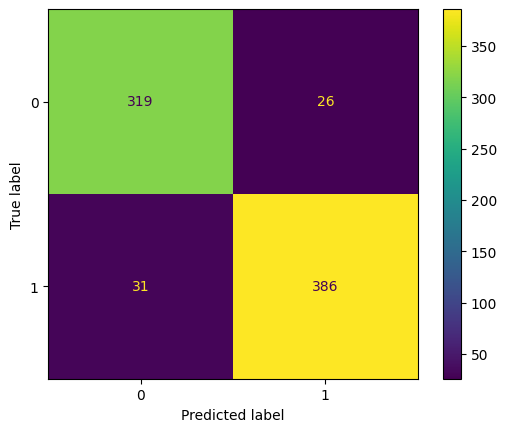

In [ ]:
cm = confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [ ]:
akurasi = accuracy_score(y_pred, y_test)
akurasi

0.9251968503937008

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       345
           1       0.94      0.93      0.93       417

    accuracy                           0.93       762
   macro avg       0.92      0.93      0.92       762
weighted avg       0.93      0.93      0.93       762



# Test with new data

In [ ]:
input = {"Area" : [15231],
         "Perimeter" : [525.578979],
         "Major_Axis_Length" : [229.749878],
         "Minor_Axis_Length" : [85.093788],
         "Eccentricity" : [0.928882],
         "Convex_Area" : [15617],
         "Extent" : [0.572896]}

input = pd.DataFrame(input) # mengubah variabel input menjadi data frame

In [ ]:
prediksi = model_lr.predict(input)

if prediksi == 0:
  print('Cammeo')
else:
  print('Osmancik')

Cammeo
